# Simple Machine Learning Concepts

In this notebook we're going to explore some simple concepts for machine learning, and then apply them to understand how the basic Regression and Classification algorithms work: Linear Regression, and Logisitic Regression.


## Graphs and Equation of a Line

Let's first explore the basic building blocks which we need to visit before we talk about anything related to machine learning.

**Data**

For our example, we have a dataset which has an input feature: X, and an output: Y

| X | Y |
|---|---|
| 1 | 1 |
| 2 | 2 | 
| 3 | 3 |

Let's look what it looks like if we plot this simple data, and then draw a line through those points.

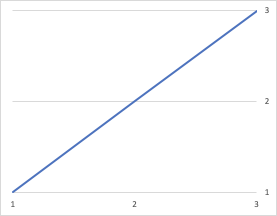

As expected, it's a line that goes through the points (1,1), (2,2), (3,3). 

**Equation of the Line**

When we have something as simple as the data above, we can quite quickly plot a line through the points by estimating the best position of the line. 

Without realising it, when you plot that line, or even, plot the graph, what you're actually describing is a relationship between the X and the Y columns. This is the Equation of the line.

For our example, we can see that for every X value, the Y value is the same. So, our equation of the line is:

```Y = X ``` Super Simple! 

However, we can define a more general equation of a straight line, which looks like:

```Y = mX + C``` where m is the gradient of the line, and C is the Y value whuch it crosses the X axis at 0.


Even if you've never seen this equation before, let's build the intuition to understand how this works.

Let's now take our data, and multiply the Y column by 2:

| X | Y |
|---|---|
| 1 | 2 |
| 2 | 4 | 
| 3 | 6 |

This means that what ever the X value is, the Y value is double this, hence our new Equation of the Line is:

```y = 2x + 0``` The + 0 comes about as this is our C value of 0


This is really good when we can quickly indentify the equation of the line, however, what happens when it's not so simple to define the equation of the line, because there are lots of data points, or a line cannot go through all the data points in a straight line?

We need to find a way to approximate the *line of best fit*, or more generally, our regression line 


## Cost Functions

So as we now know the equation of the line is simply a method of mapping the inputs to the output values of some tabular data, how do we find a line of best fit when we can't easily find the equation of the line because the data is too big or messy?

We need to use a cost function, which is simply a fancy way of saying a method which allows us to find the line of best fit.

Say we have the new data which has a plot such as:

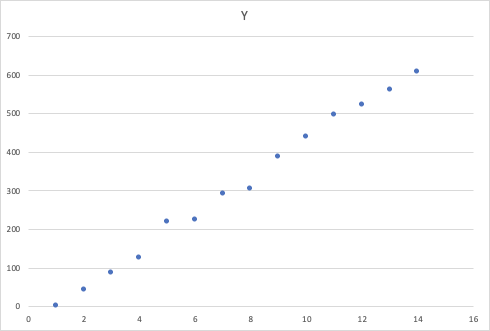

If we were to find the line of best fit, compared to our previous example where the straight line wen't through all the points, in this example our line of best fit would be a line which goes through as many of the points as poissible, or where the distance between the points and the line is as small as possible.

It turns out, this is a cost function, where we're trying to minimize the distance between the points and the line.

For this example, we're looking at a cost function called: Mean Square Error.

\begin{aligned}
\operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.
\end{aligned}

**All this states is:**

The mean of the square of errors, which means that we measure the distance from the data point and the line, and then add them all up, and divide by the total number of data points in our dataset.

So going back to our example, if we have the MSE cost function, we first generate a random line of best fit, calculate the error from that line, and then decide whether that error is too big or small, and depending on our requirements, adjust our line again to see if we can minimize the error. 

Again, it's super important to understand at what point we need to reduce this MSE value, because, in most cases, the more you reduce the error, the less generalizable the model is..More on that later!



## Minimizing Cost Using Gradient Descent 

Ok, so now we need a computationally efficient way to generate this line of best fit, we don't want to just randomly assign values to ```m``` and ```c``` and see if we can reduce the error.

Through Intuition, we know that as the cost is reducing, we're starting to generate a better line of best fit for our data points, which means our *model* contains less error (Remember, we're using Mean Square Error (MSE) to measure error.

So one way would be to use the reduction in the cost function as a way to adjust the ```m``` and ```c``` values. To do this, we need to understand that there is a relationship between the gradient of the cost functions graph (see below), and the way we can reduce the error.

In order to obtain the gradient of the graph, we need to do a little bit of math **scary terms - partial deriviatives**, but this simply allows us to determine the gradient of the line at a given point, and then use this to generate new ```m``` and ```c``` values.


For now, we're not going to need to know how to derive the partial deriviatives from our cost function, but we we need ot know that the gradients of `m` and `c` are caculated  by:

\begin{aligned}
f'(m,b) = 
     \begin{bmatrix}
       \frac{df}{dm} \\
       \frac{df}{db} \\
       \end{bmatrix} =
     \begin{bmatrix}
       \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
       \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
      \end{bmatrix}
\end{aligned}


We then we recalcuate the y^ values, and see if the cost (MSE) has reduced. At each step we want to ensure the cost value is reducing, and the rate at which we step between points is determined by a multiplier called ```learning rate```. 


First let's begin with the understanding.

The following Pseducode represents the general algorithm for Gradient Descent:


```pseudo
1. Initialize weights (m), bias (c) to random number (usually 0)
2. For (number of epochs):
    
    y_hat: generative predictions using function of line (e.g. y = mx + c)
    cost: calcuate the cost with new predictions
    
    for N samples in dataset:
        #calcuate derivatives
        d_m: calculate partial derivative with respect to m
        d_c: calculate partial derivative with respect to c
    end for
    
    #update weights and bias by derivatives and learning_rate
    m: m - learning_rate * d_m
    c: c - learning_rate * c_c
   end For
   
   return m, c
    
```    

With respects to the number of times we loop and generate the improved score, it depends on whether we're improving in terms of our cost function, which is related to a series of factors (we don't need to worrry about this right now).

Once we've got our new ```m``` and ```c``` values, we're ready to use this to predict new values

# Gradient Descent Example

In the following Example we're going to take the concepts and apply them with the MSE cost function

Making Data with the following Linear Equation: y = 3x + 1


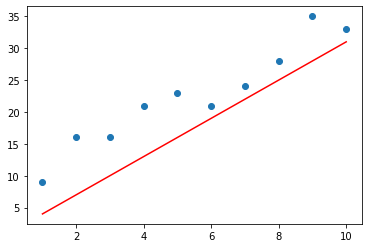

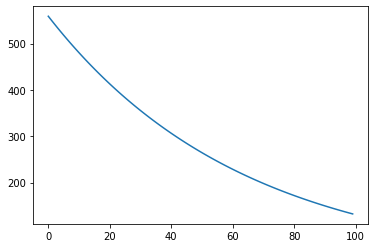

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

def make_data(n=100, m=2.5, c=1):
    
    x = np.arange(1,n+1,1)
    y = []
    
    for i in range(0,n):
        tmp = (m*x[i] + c) + (random.randrange(10))
#         print(x[i], tmp)
        y.append(tmp)
    
#     print(len(x),len(y))
    return x, y

def display_model_and_regression(X,y,m,c):
    Y_pred = m*X + c

    plt.scatter(X, y) 
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
    plt.show()
    
def display_model_cost(cost_history):
    
    cost = list(cost_history.values())
    itrs = list(cost_history.keys())
    plt.plot(itrs, cost)
    plt.show()

def cost_function(X, y, m, c):
    datapoints = len(X)
    total_error = 0.0
    for i in range(datapoints):
        total_error += (y[i] - (m*X[i] + c))**2
        
    return total_error / datapoints

        
def update_weights(X, y, m, c, learning_rate):
    m_deriv = 0
    c_deriv = 0
    datapoints = len(X)

    for i in range(datapoints):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (y[i] - (m*X[i] + c))

        # -2(y - (mx + b))
        c_deriv += -2*(y[i] - (m*X[i] + c))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / datapoints) * learning_rate
    c -= (c_deriv / datapoints) * learning_rate

    return m, c



def gradient_descent(X, y, learning_rate=0.0001, epochs=100):

    m = 0
    c = 0
    n = len(X)
    cost_history = {}
    for i in range(epochs): 
        
        m,c = update_weights(X, y, m, c, learning_rate)
        cost = cost_function(X, y, m, c)
        cost_history[i] = abs(cost)      
#         if i % (epochs/10) == 0:
#             print('Weight: {:+.2f}, Bias: {:+.2f} Cost: {:+.2f}. Epochs: {}'.format(m, c, cost, i))
# #     display_model_cost(cost_history)
    return cost, cost_history
    
m = 3
c = 1
print('Making Data with the following Linear Equation: y = {}x + {}'.format(m,c))
X,y = make_data(n=10, m=m, c=c)
display_model_and_regression(X,y,m,c)
    
lowest_cost, cost_history = gradient_descent(X, y)
display_model_cost(cost_history)


In [48]:
# demonstrate hyperparameter grid search!

def grid_search(X,y, min_learning_rate=0.0001, max_learning_rate=0.001, min_epochs=10, max_epochs=150):
    '''
    Simple Grid search to show how learning rates and epochs change the costs identified.
    '''
    
    costs = []
    lr_step = min_learning_rate
    epoch_steps = 10
    
    lr = min_learning_rate 
    
    loops = 0
    while lr < max_learning_rate:
        
        for epoch in range(min_epochs, max_epochs, epoch_steps):  
            
            cost, cost_history = gradient_descent(X, y, learning_rate=lr, epochs=epoch )
            costs.append((epoch,lr,cost))
            
            loops += 1
            
        lr += lr_step
        
    print('Grid Search Complete, {} Loops'.format(loops))
    lowest_cost = min(costs)
    print('lowest Cost:',lowest_cost)
    return costs

costs = grid_search(X,y)

Grid Search Complete, 126 Loops
lowest Cost: (10, 0.0001, 487.6856799568174)


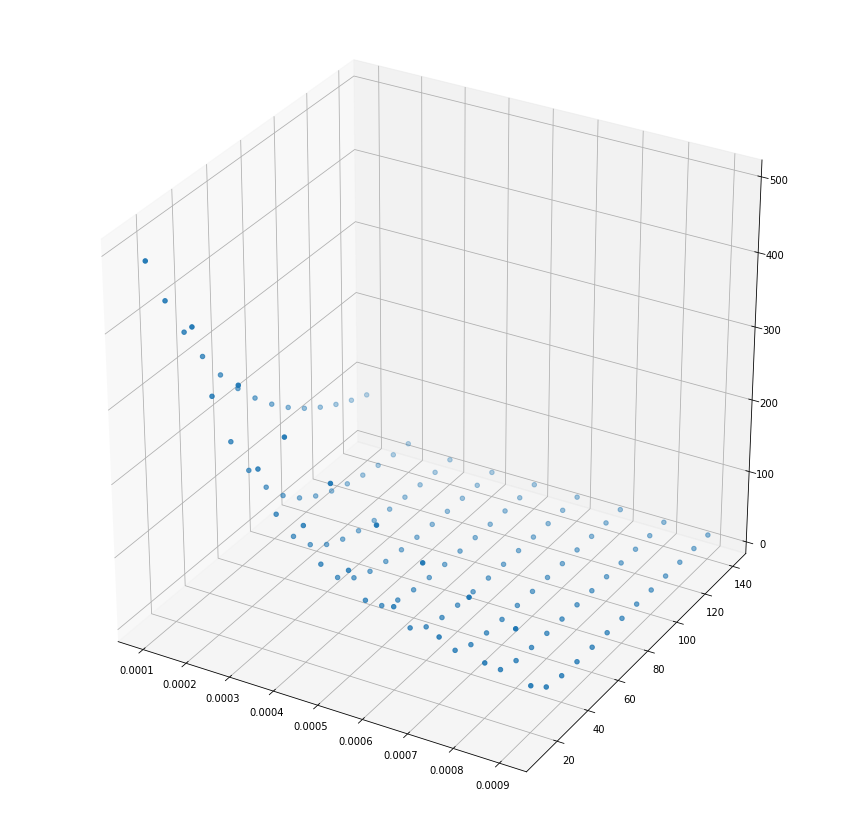

In [50]:
def display_grid_results(costs):
    
    epochs = [a_tuple[0] for a_tuple in costs]
    lrs = [a_tuple[1] for a_tuple in costs]
    cost = [a_tuple[2] for a_tuple in costs]
    fig = plt.figure(figsize=(15,15))

    ax = plt.axes(projection='3d')
    ax.scatter3D(lrs, epochs, cost,  cmap='Greens');
    plt.show()
    
display_grid_results(costs)

In [ ]:
costs